# HEATMAP TAMMY ABRAHAM

In [1]:
import LanusStats as ls
import pandas as pd
import matplotlib.font_manager as font_manager
from mplsoccer import add_image, VerticalPitch
from PIL import Image
import matplotlib as mpl

In [2]:
#import SofaScore class

sofascore = ls.SofaScore() #https://github.com/federicorabanos/LanusStats

## Get average position

In [3]:
match_urls = [
    "https://www.sofascore.com/it/football/match/lazio-milan/RdbsZdb#id:12499280",
    "https://www.sofascore.com/it/football/match/milan-venezia/NdbsRdb#id:12499291",
    "https://www.sofascore.com/it/football/match/inter-milan/RdbsXdb#id:12499299",
    "https://www.sofascore.com/it/football/match/milan-lecce/OdbsRdb#id:12499309"
]
player_name = "Tammy Abraham"

avg_df = pd.DataFrame()

for url in match_urls:
    df_match = sofascore.get_players_average_positions(url)  # Returns a tuple (home team, away team)
    
    # Home and away team player data
    home_players = df_match[0]
    away_players = df_match[1]
    
    # Check whether Milan is the home or away team and whether it lists Tammy Abraham among the players
    if "Milan" in home_players['team'].values:
        player_data = home_players[home_players['name'] == player_name]
    elif "Milan" in away_players['team'].values:
        player_data = away_players[away_players['name'] == player_name]
    else:
        print(f"Milan not found: {url}")
        continue
    
    # we concatenate the player data to the main DataFrame
    avg_df = pd.concat([avg_df, player_data], ignore_index=True)

# We keep only the columns 'averageX' and 'averageY'
avg_df = avg_df[['averageX', 'averageY']]

print(avg_df)

    averageX   averageY
0  75.172727  58.236364
1  54.984000  49.792000
2  59.675862  52.562069
3  65.977273  48.218182


In [4]:
avg_x = avg_df["averageX"].mean()
avg_y = avg_df["averageY"].mean()

print(avg_x)
print(avg_y)

63.9524655172415
52.20215360501575


In [5]:
combined_df = pd.DataFrame()

# Applies the function on each URL and combines the results
for url in match_urls:
    heatmap_df = sofascore.get_player_heatmap(url, player_name)
    combined_df = pd.concat([combined_df, heatmap_df], ignore_index=True)

print(combined_df)

     x   y
0   67  73
1   87  54
2   76  79
3    3  41
4   87  44
..  ..  ..
82  95  57
83  72  56
84  73   9
85   7  44
86  91  80

[87 rows x 2 columns]


In [6]:

font_path_regular = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
font_props_regular = font_manager.FontProperties(fname=font_path_regular) # Create a font properties object with the font file

font_path_medium = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_props_medium = font_manager.FontProperties(fname = font_path_medium)

font_path_light = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Light.ttf"
font_props_light = font_manager.FontProperties(fname = font_path_light)


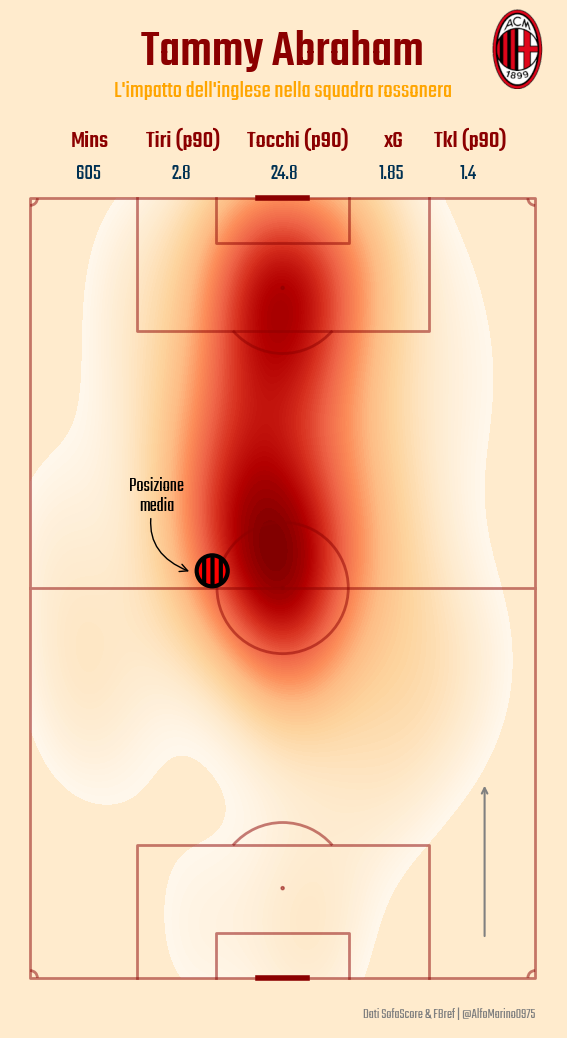

In [8]:

image_path = "/Users/alfonsomarino/Desktop/LoghiITA/Milan.png"
img = Image.open(image_path)

pitch = VerticalPitch(pitch_type='opta', corner_arcs=True, pitch_color = "blanchedalmond", line_color="darkred", line_alpha=0.5)

fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, title_space=0,
                      axis=False, ncols = 1,
                      grid_height=0.82, endnote_height=0.03)
fig.patch.set_facecolor('blanchedalmond')


kde_abr = pitch.kdeplot(combined_df.x, combined_df.y, ax=axs['pitch'],
                    # fill using 100 levels so it looks smooth
                    fill=False, levels=100, shade = True, zorder = -1,
                    cmap="OrRd")

mpl.rcParams['hatch.linewidth'] = 3
axs["pitch"].scatter(avg_x, avg_y, s = 500, color = "red", edgecolor = "black", hatch='||', linewidth=3)

#Credit
axs['endnote'].text(1, 0.5, 'Dati SofaScore & FBref | @AlfoMarino0975', va='center', ha='right', fontsize=10, 
                     fontproperties = font_props_regular, color = "grey")

axs["title"].text(
    x=0.8, 
    y=0.4, 
    s='Tkl (p90)', 
    fontsize=18, 
    fontproperties=font_props_medium, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

axs["title"].text(
    x=0.85, 
    y=0, 
    s="1.4", 
    fontsize=16, 
    fontproperties=font_props_regular, 
    color='#003153', 
    ha='left'
)

axs["title"].text(
    x=0.7, 
    y=0.4, 
    s='xG', 
    fontsize=18, 
    fontproperties=font_props_medium, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

axs["title"].text(
    x=0.69, 
    y=0, 
    s="1.85", 
    fontsize=16, 
    fontproperties=font_props_regular, 
    color='#003153', 
    ha='left'
)


axs["title"].text(
    x=0.43, 
    y=0.4, 
    s='Tocchi (p90)', 
    fontsize=18, 
    fontproperties=font_props_medium, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

axs["title"].text(
    x=0.475, 
    y=0, 
    s="24.8", 
    fontsize=16, 
    fontproperties=font_props_regular, 
    color='#003153', 
    ha='left'
)


axs["title"].text(
    x=0.23, 
    y=0.4, 
    s='Tiri (p90)', 
    fontsize=18, 
    fontproperties=font_props_medium, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

axs["title"].text(
    x=0.28, 
    y=0, 
    s="2.8", 
    fontsize=16, 
    fontproperties=font_props_regular, 
    color='#003153', 
    ha='left'
)

axs["title"].text(
    x=0.08, 
    y=0.4, 
    s='Mins', 
    fontsize=18, 
    fontproperties=font_props_medium, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

axs["title"].text(
    x=0.09, 
    y=0, 
    s="605", 
    fontsize=16, 
    fontproperties=font_props_regular, 
    color='#003153', 
    ha='left'
)

# Add arrow in the pitch
axs['pitch'].annotate('', xy=(10, 25), xytext=(10, 5),
                         arrowprops=dict(edgecolor='grey', arrowstyle='->', lw=1.5))

axs["pitch"].annotate('Posizione\nmedia', xy=(68, 52), xytext=(75, 60),
             arrowprops=dict(facecolor='white', arrowstyle='->', connectionstyle="arc3,rad=.5"),
             fontsize=14, fontproperties = font_props_regular, ha='center')


axs['title'].text(0.5, 1.6, "Tammy Abraham", color='darkred',
                  va='center', ha='center', fontsize=38, fontproperties = font_props_medium)


axs['title'].text(0.5, 1.1, "L'impatto dell'inglese nella squadra rossonera", color='orange',
                  va='center', ha='center', fontsize=18, fontproperties = font_props_regular)

ax_logo = add_image(img, fig,
                       # set the left, bottom and height to align with the endnote
                       left=axs['title'].get_position().x1 - 0.1,
                       bottom=axs['title'].get_position().y1 + 0.009,
                       height=axs['title'].get_position().height)

# Salva la figura come file immagine
#output_path = "/Users/alfonsomarino/Desktop/abraham_heatmap.png"
#fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())